# Sequences and Series

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let us define a few sequences. 

## The geometric *Sequence* (not series!) $a_n = 1/n$

Below The call method is the one used when you use the class as if it were a function, as in classInstance = class(parameter1, parameter2) y=classInstance(x) That classInstance(x) executes the call method.

In [2]:
class harmonicSequence:
    def generateSequence(self):
        self._Sn = 1/np.arange(1, self._order)
            
    def __init__(self, order=10):
        self._order=order
        self.generateSequence()

    def mini(self):
        return 1
    def maxi(self):
        return self._order
    
    def __call__(self):
        return self._Sn

Let's define a class to draw this:

In [3]:
def draw(mySeriousSeries, label=" ", scale=1):
    nArray=np.arange(mySeriousSeries.mini(), mySeriousSeries.maxi())
    plt.plot(nArray,scale*mySeriousSeries(), label=label)
    plt.legend(loc="lower left")

We define an instance of our sequence class:

In [4]:
n=10
harmonicSequenceArray = harmonicSequence(n)  

I'd also like to draw the limit. Now $\lim\limits_{n\to \infty} \frac{1}{n} = 0$, so to draw that into the plot as a straight line, I generate an array of zeroes.

In [5]:
harmonicLimitArray = np.zeros(10)

Now I'm ready to draw it:

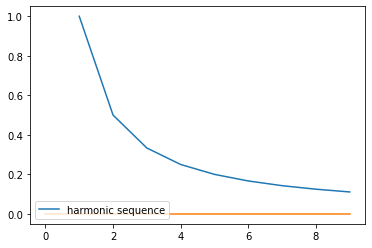

In [6]:
draw(harmonicSequenceArray, label="harmonic sequence")
plt.plot(harmonicLimitArray)
plt.show()

## The geometric series $S_n = a_0 \sum\limits_{k=0}^n q^n$ with $|q| < 1$

In [7]:
class geometricSeries:
    def generateSeries(self):
        su=0
        r=1
        for i in range(0, self._order):
            su += r
            self._Sn[i] = su
            r *= q
            
        self._Sn *= self._a
            
    def __init__(self, order=10, q=1/2, a0=1):
        self._order=order
        self._q=q
        self._a=a0
        self._Sn = np.zeros(self._order)
        self.generateSeries()

    def mini(self):
        return 0
    def maxi(self):
        return self._order
    
    def __call__(self):
        return self._Sn



Now we can define an instance of our harmonic series class

In [8]:
n=10
q=1/2
a0=1.0
geometricSeriesArray = geometricSeries(n, q, a0)  
geometricLimitArray = np.ones(n)*a0/(1.0-q)

... and draw it:

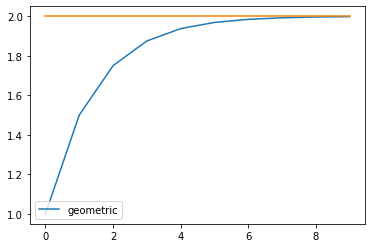

In [9]:
draw(geometricSeriesArray, label="geometric")
plt.plot(geometricLimitArray)
plt.show()

## Alternating harmonic series, $S_n = \sum\limits_{k=1}^n (-1)^{(n+1)} \frac{1}{k}$

In [10]:
class alternatingHarmonicSeries:
    def generateSeries(self):
        i=1
        sum=0
        for k in range(1, self._order): 
            sum += i/k
            self._Sn[k-1] = sum  # I'm filling the kth element into the k-1st position of the numpy array, whose indexing starts at zero
            i*=-1

    def __init__(self, order=10):
        self._order=order
        self._Sn = np.zeros(self._order-1)
        self.generateSeries()

    def mini(self):
        return 1
    def maxi(self):
        return self._order
    
    def __call__(self):
        return self._Sn



Let's create an instance of it (and one for the limit)

In [25]:
n=30
alternatingHarmonicArray = alternatingHarmonicSeries(n)  
alternatingHarmonicLimitArray = np.ones(n)*np.math.log(2)

and draw it

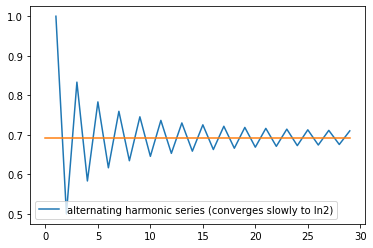

In [26]:
draw(alternatingHarmonicArray, label="alternating harmonic series (converges slowly to ln2)")
plt.plot(alternatingHarmonicLimitArray)
plt.show()

## The (diverging) harmonic series, $S_n = \sum\limits_{k=1}^n \frac{1}{k}$

In [13]:
class harmonicSeries:
    def generateSeries(self):
        sum=0
        for k in range(1, self._order): 
            sum += 1/k
            self._Sn[k-1] = sum  # I'm filling the kth element into the k-1st position of the numpy array, whose indexing starts at zero

    def __init__(self, order=10):
        self._order=order
        self._Sn = np.zeros(self._order-1)
        self.generateSeries()

    def mini(self):
        return 1
    def maxi(self):
        return self._order
    
    def __call__(self):
        return self._Sn



Let's create an instance of it (and one for the limit)

In [29]:
n=30
harmonicArray = harmonicSeries(n)  

and draw it

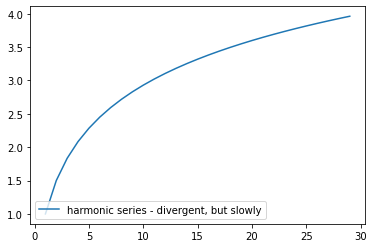

In [30]:
draw(harmonicArray, label="harmonic series - divergent, but slowly")
plt.show()

## The series $\sum\limits_{k=1}^n \frac{1}{k!}$

In [16]:
class expoSeries:
    def generateSeries(self):
        a=1.0
        su=1.0
        self._Sn[0]=su
        for n in range(1, self._order):
            a*=self._x/n
            su+=a
            self._Sn[n]=su
            
    def __init__(self, order=10, x=1):
        self._order=order
        self._x=x
        self._Sn = np.zeros(self._order)
        self.generateSeries()

    def mini(self):
        return 0
    def maxi(self):
        return self._order
    
    def __call__(self):
        return self._Sn
    

Let's create an instance of it (and one for the limit)

In [17]:
n=10
expoArray = expoSeries(n)  
expoLimitArray = np.ones(n)*np.exp(1) # this series converges to e

and draw it

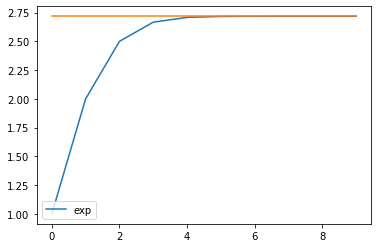

In [18]:
draw(expoArray, label="exp")
plt.plot(expoLimitArray)
plt.show()

## The sequence $a_n = \left(1 + \frac{1}{n}\right)^n$
This seqence, just like the series above, converges to $e$, but much more slowly.

In [19]:
class slowExpSequence:
    def generateSequence(self):
        n = np.arange(1, self._order)
        self._Sn = (1 + 1/n)**n

    def __init__(self, order=10):
        self._order=order
        self.generateSequence()

    def mini(self):
        return 1
    def maxi(self):
        return self._order
    
    def __call__(self):
        return self._Sn



Let's create an instance of the slow, the fast and the limit of the series/sequence that converge to an exponential

In [20]:
n=10
slowExpoArray = slowExpSequence(n)
fastExpoArray = expoSeries(n)  
expoLimitArray = np.ones(n)*np.exp(1) 

and let's draw it into the same plot as the fast one.

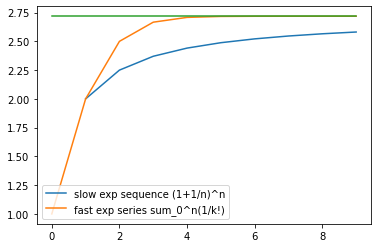

In [21]:
draw(slowExpoArray, label="slow exp sequence (1+1/n)^n")
draw(fastExpoArray, label="fast exp series sum_0^n(1/k!)")
plt.plot(expoLimitArray)
plt.show()